In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Load Dataset


In [2]:
dataset=pd.read_csv('sample_data/Social_Network_Ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Data Preprocessing

In [4]:
dataset['Gender'].replace('Male',0,inplace=True)
dataset['Gender'].replace('Female',1,inplace=True)

In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [6]:
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
model=KNeighborsClassifier(n_neighbors=20,metric='euclidean')

In [10]:
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [11]:
y_pred=model.predict(X_test)

In [12]:
cm=confusion_matrix(y_test,y_pred)

In [13]:
print(cm)

[[52  3]
 [ 3 22]]


In [14]:
f1=f1_score(y_test,y_pred)

In [15]:
print(f1)

0.88


In [16]:
print(accuracy_score(y_test,y_pred))

0.925


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.88      0.88      0.88        25

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



In [18]:
error_rate=[]

In [20]:
from sklearn import metrics
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error rate')

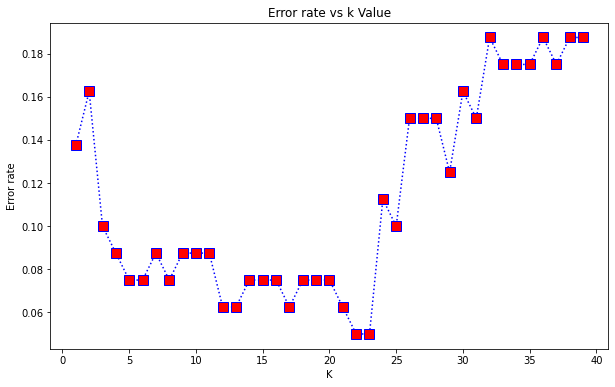

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dotted",marker='s',markerfacecolor="red",markersize=10)
plt.title("Error rate vs k Value")
plt.xlabel('K')
plt.ylabel('Error rate')

In [23]:
model=KNeighborsClassifier(n_neighbors=23,metric="euclidean")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cf=classification_report(y_pred,y_test)



In [25]:
print(cf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.92      0.92      0.92        25

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

